In [107]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
from rdkit import Chem
from IPython.display import display

In [127]:
from aizynthfinder.aizynthfinder import AiZynthFinder

finder = AiZynthFinder("config/config.yml")

In [128]:
# finder.stock.selection = 'molport_3d'
# finder.stock.selection = 'molport_5d'
finder.stock.selection = 'molport_7d'
# finder.stock.selection = 'zinc'
finder.config.expansion_policy.selection = 'uspto'
finder.config.filter_policy.selection = 'uspto'

In [129]:
finder.config.search.time_limit = 120
finder.config.search.iteration_limit = 5000
finder.config.search.max_transforms = 6
finder.config.search.return_first = False

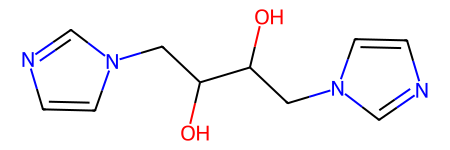

120.05557465553284

In [130]:
# gdb17
# smi = "CCN(C)C(C)(C)C1=NN(CC(C)C)N=C1"
# smi = "CCCC(O)C1=CC=NC=C1C1N=COC1C"
# smi = "CCN(C1=NC(CO)=CC=C1Cl)C(C)(C)C"
# smi = "CCC(C)N(CC1=CN=CO1)CC1=CNC=C1"
# smi = "CC(OC1=CC=CN=C1C1=NC(C)=NO1)C#N"
# smi = "CC(=O)NC1=NC=C(C)C=C1C1=CSN=C1O"

# chembl
smi = "CCCCCCN(C)Cc1cc(N)ccc1O"
smi = "CNc1cc(-c2ccc(OC)nc2)ncn1"
smi = "OC(Cn1ccnc1)C(O)Cn1ccnc1"

display(Chem.MolFromSmiles(smi))

finder.target_smiles = smi
finder.prepare_tree()
finder.tree_search(show_progress=True)

In [131]:
finder.search_stats

{'returned_first': False,
 'iterations': 1767,
 'first_solution_time': 0.5788452625274658,
 'first_solution_iteration': 5,
 'time': 120.05557465553284}

In [142]:
rewards = finder.config.search.algorithm_config["search_rewards"]
finder.build_routes(scorer=rewards)
print('Solved', len([r for r in finder.routes if r['route_metadata']['is_solved']]))
finder.routes[8]['reaction_tree'].to_image(inverse=True)

Solved 8


IndexError: Index out of range